In [17]:
import xarray as xr
import numpy as np
from scipy.stats import linregress
from rv_ENSO import rv_ENSO
import matplotlib.pyplot as plt
import xskillscore as xs
import cartopy.crs as ccrs 
import warnings
warnings.filterwarnings("ignore")

In [13]:
def cal_r_2D_decade(dataa):
    ff = dataa.groupby('time.year').mean('time')
    a = xr.DataArray(ff.year, dims="year").astype(float)
    b = xr.DataArray(ff[0], dims=['lat', 'lon'],\
                    coords={'lat': ff.lat, 'lon': ff.lon})
    year_xr, b2 = xr.broadcast(a, b)
    return xs.linslope(year_xr, ff, dim="year", skipna=True)*10, \
        xs.pearson_r_p_value(year_xr, ff, dim="year", skipna=True)     

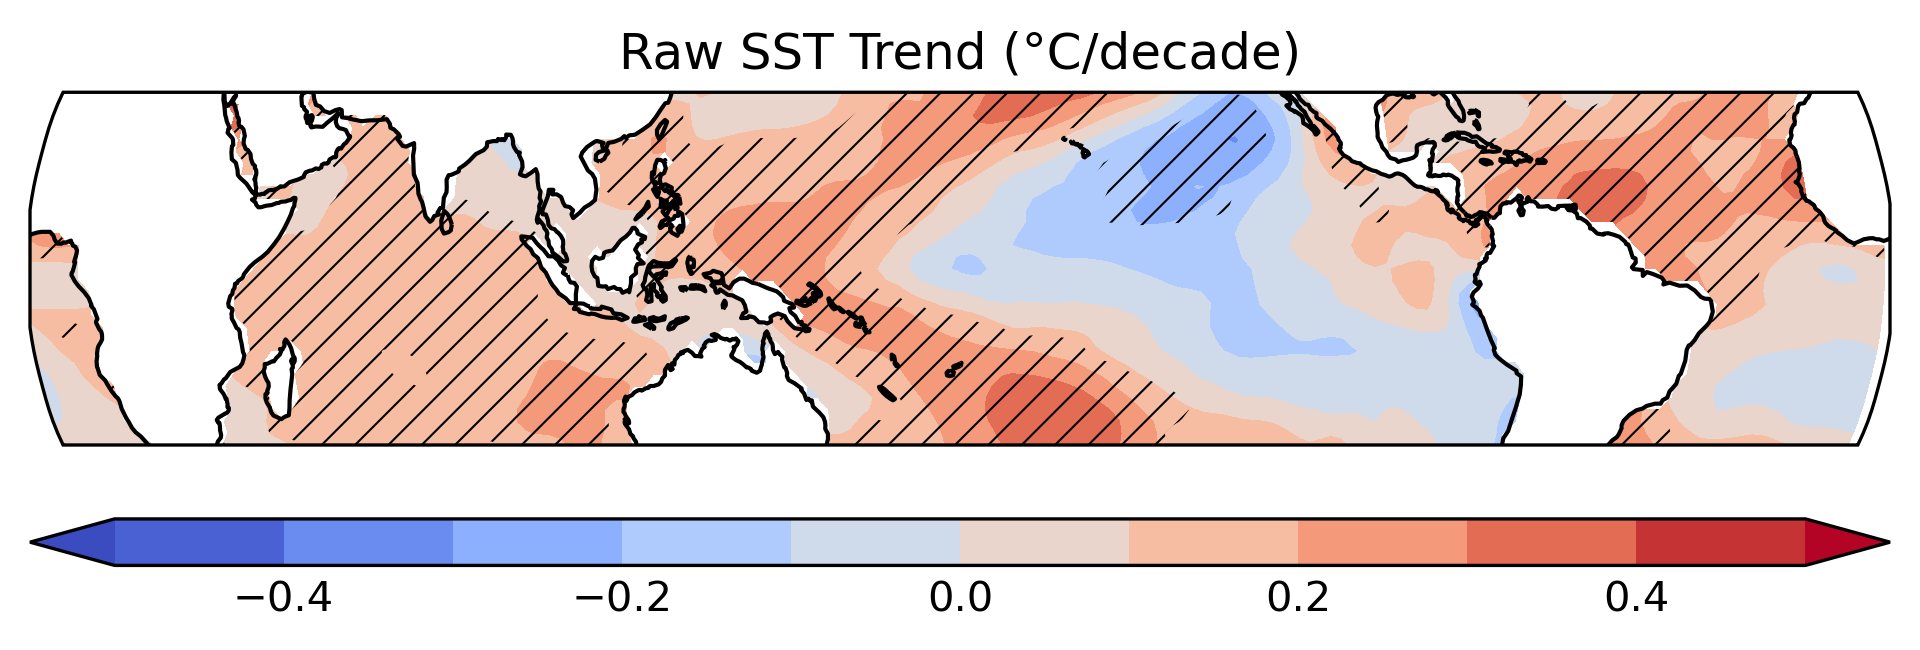

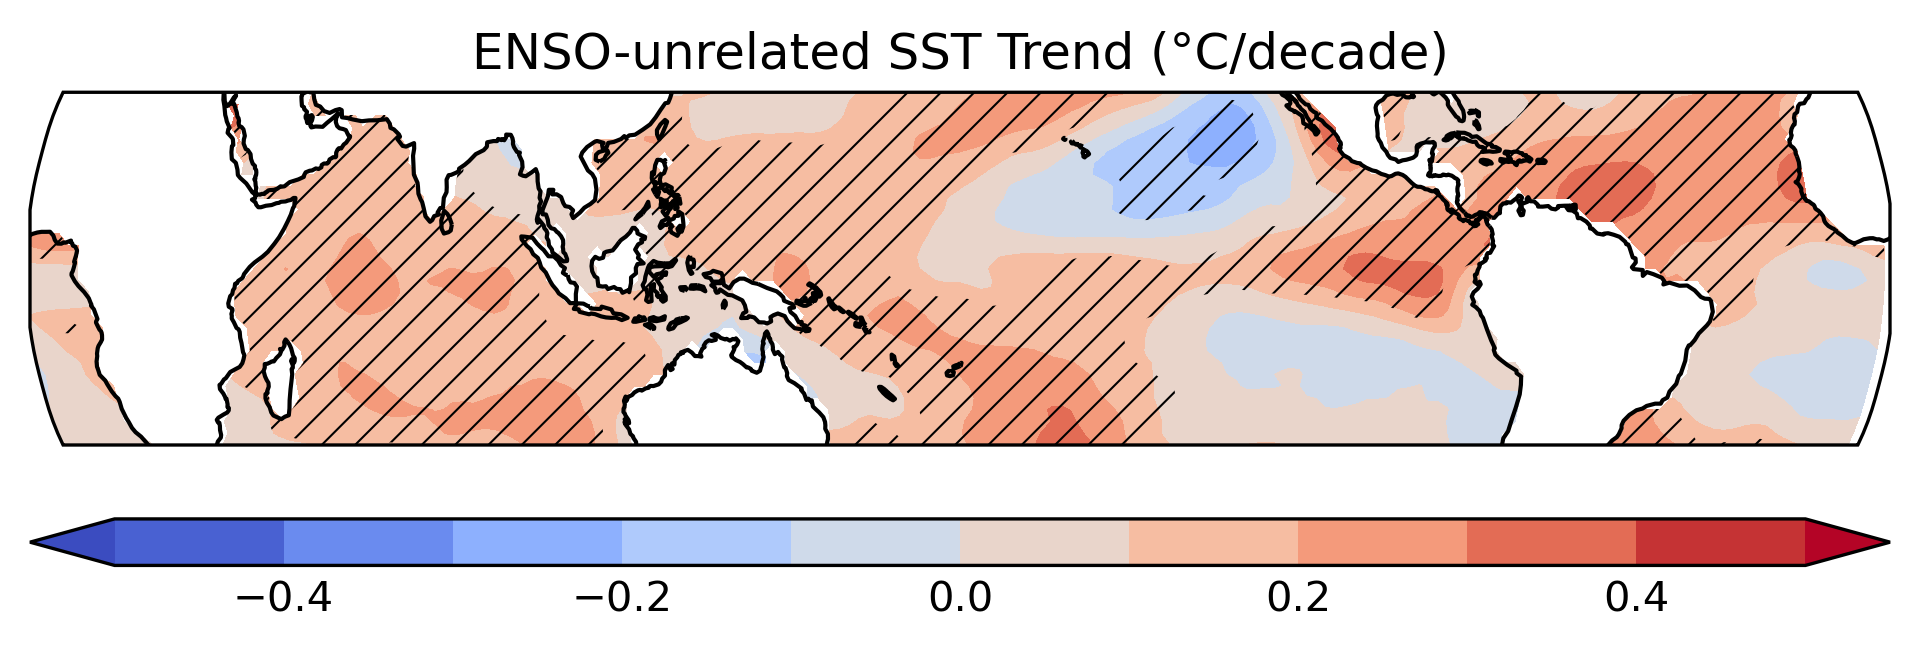

In [25]:
file_name = 'sst.mnmean.19852014.nc'
sst_raw = xr.open_dataset(file_name)['sst'].sel(lat=slice(30, -30))
sst_enso_unrelated = rv_ENSO(sst_raw)['ENSO-unrelated']

fig = plt.figure(figsize=(8, 4), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_extent([0,359,-30,30], crs = ccrs.PlateCarree())
r_ob,p = cal_r_2D_decade(sst_raw)
variable = r_ob
cf = ax.contourf( variable.lon, variable.lat, variable, list(np.arange(-.5,.51,.1)), \
                    cmap='coolwarm', transform=ccrs.PlateCarree(), extend='both')
ax.coastlines()
ax.set_title('Raw SST Trend (°C/decade)')
ax.contourf(p.lon, p.lat, p, levels=[0, 0.05, 1],hatches=['///', ''], alpha=0, \
    transform=ccrs.PlateCarree())
plt.rcParams['hatch.linewidth'] = 0.5
cbar = plt.colorbar(cf, orientation='horizontal', pad=.08, aspect=40)
cbar.ax.tick_params(length=0)
plt.show()

fig = plt.figure(figsize=(8, 4), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_extent([0,359,-30,30], crs = ccrs.PlateCarree())
r_ob,p = cal_r_2D_decade(sst_enso_unrelated)
variable = r_ob
cf = ax.contourf( variable.lon, variable.lat, variable, list(np.arange(-.5,.51,.1)), \
                    cmap='coolwarm', transform=ccrs.PlateCarree(), extend='both')
ax.coastlines()
ax.set_title('ENSO-unrelated SST Trend (°C/decade)')
ax.contourf(p.lon, p.lat, p, levels=[0, 0.05, 1],hatches=['///', ''], alpha=0, \
    transform=ccrs.PlateCarree())
plt.rcParams['hatch.linewidth'] = 0.5
cbar = plt.colorbar(cf, orientation='horizontal', pad=.08, aspect=40)
cbar.ax.tick_params(length=0)
plt.show()